# Scikit-Learn_Introduction / 20241001

！！！🐍 由于原著版权原因，此学习笔记仅限个人交流学习目的，不做任何商业或广播用途。

！！！🐍 Reference: --> https://scikit-learn.org/stable/index.html

# User Guide / 20241010

# §01 Section Navigation

1. Supervised learning / 监督学习
2. Unsupervised learning / 无监督学习
3. Model selection and evaluation / 模型选择和评估
4. Inspection / 检查
5. Visualizations / 可视化
6. Dataset transformations / 数据集转换
7. Dataset loading utilities / 数据集加载实用程序
8. Computing with scikit-learn / 使用 scikit-learn 进行计算
9. Model persistence / 模型持久性
10. Common pitfalls and recommended practices / 常见陷阱和推荐做法
11. Dispatching / 调度
12. Choosing the right estimator / 选择正确的估算器
13. External Resources, Videos and Talks / 外部资源、视频和演讲

## 1. Supervised learning / 监督学习

### 1.1 Linear Models / 线性模型 - 20241024

The following are a set of methods intended for regression in which
the target value is expected to be a linear combination of the features.
In mathematical notation, if $\hat{y}$ is the predicted value.

$$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$$

Across the module, we designate the vector $w = (w_1,..., w_p)$ as ``coef_`` and $w_0$ as ``intercept_``.

以下是一组用于回归的方法，其中
目标值预计是特征的线性组合。
在数学符号中，如果 $\hat{y}$ 是预测值。

在整个模块中，我们将向量 $w = (w_1,..., w_p)$ 指定为 ``coef_``，将 $w_0$ 指定为 ``intercept_``。

#### 1.1.1 Ordinary Least Squares / 普通最小二乘法

``LinearRegression`` fits a linear model with coefficients $w = (w_1, ..., w_p)$ to minimize the residual sum of squares between the observed targets in the dataset, and the
targets predicted by the linear approximation. Mathematically it
solves a problem of the form:

$$\min_{w} || X w - y||_2^2$$

``LinearRegression`` 拟合一个线性模型，其系数为 $w = (w_1, ..., w_p)$，以最小化数据集中观察到的目标与线性近似预测的目标之间的残差平方和。从数学上讲，它解决了以下形式的问题：

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


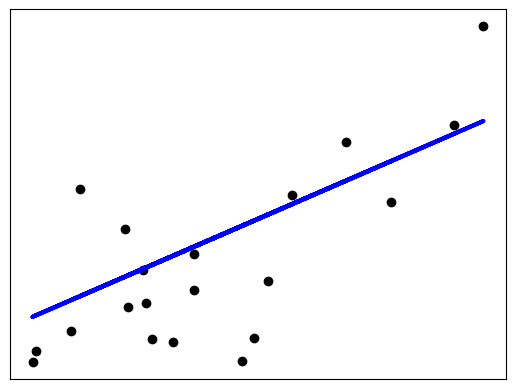

In [3]:
# Linear Regression Example
# d01_1_1_plot_ols.py

%run d01_1_eg1_plot_ols.py

``LinearRegression`` will take in its ``fit`` method arrays ``X``, ``y``
and will store the coefficients $w$ of the linear model in its ``coef_`` member:

``LinearRegression`` 将在其 ``fit`` 方法中采用数组 ``X``、``y`` 并将线性模型的系数 $w$ 存储在其 ``coef_`` 成员中：

In [2]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

reg.coef_

array([0.5, 0.5])

#### 1.1.1.1. Non-Negative Least Squares / 非负最小二乘法

It is possible to constrain all the coefficients to be non-negative, which may
be useful when they represent some physical or naturally non-negative
quantities (e.g., frequency counts or prices of goods).
`LinearRegression` accepts a boolean ``positive``
parameter: when set to `True` `Non-Negative Least Squares` are then applied.

可以将所有系数限制为非负数，当它们表示某些物理或自然非负量（例如，频率计数或商品价格）时，这可能很有用。`LinearRegression` 接受布尔 `positive` 参数：当设置为 `True` 时，将应用 ``非负最小二乘法``。

NNLS R2 score 0.8225220806196525
OLS R2 score 0.7436926291700352


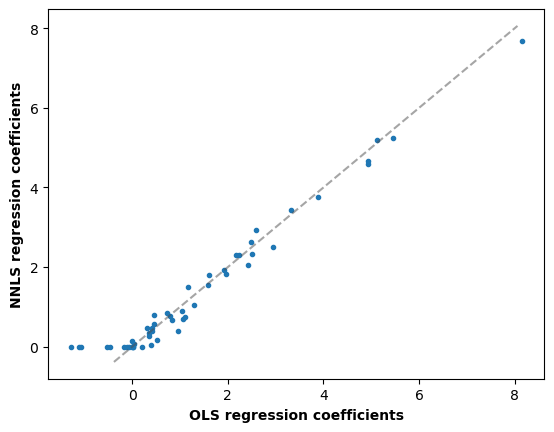

In [4]:
# Non-negative least squares
# d01_1_2_plot_nnls.py

"""
from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive=True) # Non-negative least squares: Positive=True
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)
"""

%run d01_1_eg2_plot_nnls.py

#### 1.1.1.2. Ordinary Least Squares Complexity / 普通最小二乘复杂度

The least squares solution is computed using the singular value
decomposition of X. If X is a matrix of shape `(n_samples, n_features)`
this method has a cost of
$O(n_{\text{samples}} n_{\text{features}}^2)$, assuming that
$n_{\text{samples}} \geq n_{\text{features}}$.

最小二乘解是使用 X 的奇异值分解来计算的。如果 X 是形状为 `(n_samples, n_features)`
的矩阵，则此方法的成本为
$O(n_{\text{samples}} n_{\text{features}}^2)$，假设
$n_{\text{samples}} \geq n_{\text{features}}$。

### 1.1.2 Ridge regression and classification / 岭回归和分类

#### 1.1.2.1. Regression / 回归

`Ridge` regression addresses some of the problems of
`ordinary_least_squares` by imposing a penalty on the size of the
coefficients. The ridge coefficients minimize a penalized residual sum
of squares:

$$\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$$

The complexity parameter $\alpha \geq 0$ controls the amount
of shrinkage: the larger the value of $\alpha$, the greater the amount
of shrinkage and thus the coefficients become more robust to collinearity(共线性).

`Ridge` 回归通过对系数的大小施加惩罚来解决 `ordinary_least_squares` 的一些问题。岭系数最小化了惩罚残差平方和：

复杂度参数 $\alpha \geq 0$ 控制收缩量：$\alpha$ 值越大，收缩量越大，因此系数对共线性 (共线性) 的鲁棒性更强。

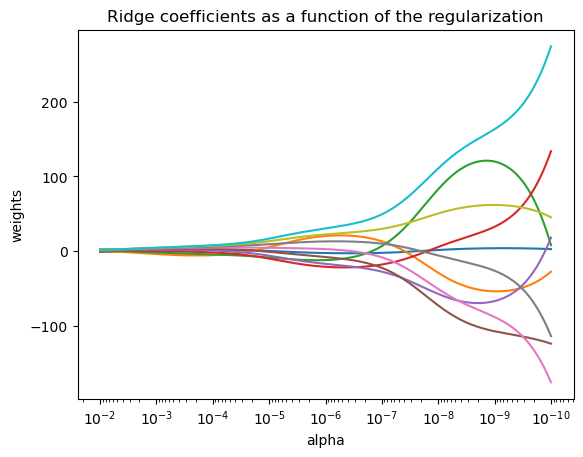

In [5]:
# Plot Ridge coefficients as a function of the regularization
# d01_1_3_plot_ridge_path.py

%run d01_1_eg3_plot_ridge_path.py

As with other linear models, `Ridge` will take in its ``fit`` method
arrays ``X``, ``y`` and will store the coefficients $w$ of the linear model in
its ``coef_`` member:

与其他线性模型一样，`Ridge` 将在其 ``fit`` 方法中采用数组 ``X``、``y``，并将线性模型的系数 $w$ 存储在其 ``coef_`` 成员中：

In [5]:
from sklearn import linear_model

reg = linear_model.Ridge(alpha=.5)

print(reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1]))

print(reg.coef_)
print(reg.intercept_)

Ridge(alpha=0.5)
[0.34545455 0.34545455]
0.1363636363636364


Note that the class `Ridge` allows for the user to specify that the
solver be automatically chosen by setting `solver="auto"`. When this option
is specified, `Ridge` will choose between the `"lbfgs"`, `"cholesky"`,
and `"sparse_cg"` solvers. :class:`Ridge` will begin checking the conditions
shown in the following table from top to bottom. If the condition is true,
the corresponding solver is chosen.

| Solver     | Condition                                      |
|------------|------------------------------------------------|
| 'lbfgs'    | The `positive=True` option is specified.       |
| 'cholesky' | The input array X is not sparse.               |
| 'sparse_cg'| None of the above conditions are fulfilled.    |

请注意，类 `Ridge` 允许用户通过设置 `solver="auto"` 来指定自动选择求解器。指定此选项后，`Ridge` 将在 `"lbfgs"`、`"cholesky"` 和 `"sparse_cg"` 求解器之间进行选择。`Ridge` 将开始从上到下检查下表中显示的条件。如果条件为真，则选择相应的求解器。

| 求解器 | 条件 |
|------------|------------------------------------------------|
| 'lbfgs' | 指定了 `positive=True` 选项。|
| 'cholesky' | 输入数组 X 不稀疏。|
| 'sparse_cg'| 以上条件均不满足。|

#### 1.1.2.2. Classification / 分类

The `Ridge` regressor has a classifier variant:
`RidgeClassifier`. This classifier first converts binary targets to
``{-1, 1}`` and then treats the problem as a regression task, optimizing the
same objective as above. The predicted class corresponds to the sign of the
regressor's prediction. For multiclass classification, the problem is
treated as multi-output regression, and the predicted class corresponds to
the output with the highest value.

It might seem questionable to use a (penalized) Least Squares loss to fit a
classification model instead of the more traditional logistic or hinge
losses. However, in practice, all those models can lead to similar
cross-validation scores in terms of accuracy or precision/recall, while the
penalized least squares loss used by the `RidgeClassifier` allows for
a very different choice of the numerical solvers with distinct computational
performance profiles.

The `RidgeClassifier` can be significantly faster than e.g.
`LogisticRegression` with a high number of classes because it can
compute the projection matrix $(X^T X)^{-1} X^T$ only once.

This classifier is sometimes referred to as a [Least Squares Support Vector
Machines](https://en.wikipedia.org/wiki/Least-squares_support-vector_machine) with
a linear kernel.

`Ridge` 回归器有一个分类器变体：
`RidgeClassifier`。此分类器首先将二元目标转换为
``{-1, 1}``，然后将问题视为回归任务，优化与上述相同的目标。预测的类别对应于回归器预测的符号。对于多类分类，问题被视为多输出回归，预测的类别对应于具有最高值的输出。

使用（惩罚）最小二乘损失来拟合分类模型而不是更传统的逻辑或铰链损失似乎值得怀疑。然而，在实践中，所有这些模型在准确度或精确度/召回率方面都可以得到相似的交叉验证分数，而 `RidgeClassifier` 使用的惩罚最小二乘损失允许选择具有不同计算性能配置文件的数值求解器。

`RidgeClassifier` 的速度可以明显快于例如`LogisticRegression` 具有大量类别，因为它只能计算一次投影矩阵 $(X^T X)^{-1} X^T$。

此分类器有时被称为具有线性核的 [最小二乘支持向量机](https://en.wikipedia.org/wiki/Least-squares_support-vector_machine)。

**Examples**

- [Plot Ridge coefficients as a function of the regularization](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py)
- [Classification of text documents using sparse features](https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py)
- [Common pitfalls in the interpretation of coefficients of linear models](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py)

#### 1.1.2.3. Ridge Complexity / Ridge复杂度

his method has the same order of complexity as `Ordinary Least Squares`.

他的方法具有与`普通最小二乘法`相同的复杂度。

#### 1.1.2.4. Setting the regularization parameter: leave-one-out Cross-Validation / 设置正则化参数：留一法交叉验证

`RidgeCV` and `RidgeClassifierCV` implement ridge
regression/classification with built-in cross-validation of the alpha parameter.
They work in the same way as `GridSearchCV` except
that it defaults to efficient Leave-One-Out `cross-validation`.
When using the default `cross-validation`, alpha cannot be 0 due to the
formulation used to calculate Leave-One-Out error. See [RL2007] for details.

`RidgeCV` 和 `RidgeClassifierCV` 实现岭回归/分类，内置 alpha 参数交叉验证。
它们的工作方式与 `GridSearchCV` 相同，只是它默认为高效的 Leave-One-Out `交叉验证`。
使用默认的 `交叉验证` 时，alpha 不能为 0，因为用于计算 Leave-One-Out 误差的公式。有关详细信息，请参阅 [RL2007]。

In [1]:
import numpy as np
from sklearn import linear_model

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
reg.alpha_

0.01

Specifying the value of the `cv` attribute will trigger the use of
cross-validation with `GridSearchCV`, for
example `cv=10` for 10-fold cross-validation, rather than Leave-One-Out
Cross-Validation.

指定 `cv` 属性的值将触发使用 `GridSearchCV` 进行交叉验证，例如 `cv=10` 表示 10 倍交叉验证，而不是留一法交叉验证。

### 1.1.3. Lasso / 套索

The `Lasso` is a linear model that estimates sparse coefficients.
It is useful in some contexts due to its tendency to prefer solutions
with fewer non-zero coefficients, effectively reducing the number of
features upon which the given solution is dependent. For this reason,
Lasso and its variants are fundamental to the field of compressed sensing.
Under certain conditions, it can recover the exact set of non-zero
coefficients (see [Compressive sensing: tomography reconstruction with L1 prior (Lasso)](https://scikit-learn.org/stable/auto_examples/applications/plot_tomography_l1_reconstruction.html#sphx-glr-auto-examples-applications-plot-tomography-l1-reconstruction-py)).

Mathematically, it consists of a linear model with an added regularization term.
The objective function to minimize is:

$$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$$

The lasso estimate thus solves the minimization of the
least-squares penalty with $\alpha ||w||_1$ added, where
$\alpha$ is a constant and $||w||_1$ is the $\ell_1$-norm of
the coefficient vector.

The implementation in the class `Lasso` uses coordinate descent as
the algorithm to fit the coefficients. See `least_angle_regression`
for another implementation:

`Lasso` 是一种估计稀疏系数的线性模型。由于它倾向于选择具有较少非零系数的解决方案，因此在某些情况下很有用，从而有效地减少了给定解决方案所依赖的特征数量。因此，Lasso 及其变体是压缩感知领域的基础。在某些条件下，它可以恢复非零系数的精确集合（参见 [压缩感知：使用 L1 先验 (Lasso) 进行断层扫描重建](https://scikit-learn.org/stable/auto_examples/applications/plot_tomography_l1_reconstruction.html#sphx-glr-auto-examples-applications-plot-tomography-l1-reconstruction-py))。

从数学上讲，它由一个添加了正则化项的线性模型组成。要最小化的目标函数是:

因此，套索估计解决了最小二乘惩罚的最小化问题，其中添加了 $\alpha ||w||_1$，其中 $\alpha$ 是常数，$||w||_1$ 是系数向量的 $\ell_1$ 范数。
类 `Lasso` 中的实现使用坐标下降作为拟合系数的算法。请参阅 `least_angle_regression` 了解另一种实现：

In [1]:
from sklearn import linear_model

reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

Lasso(alpha=0.1)

In [2]:
reg.predict([[1, 1]])

array([0.8])

The function `lasso_path` is useful for lower-level tasks, as it computes the coefficients along the full path of possible values.

函数`lasso_path`对于较低级别的任务很有用，因为它可以计算沿着可能值的完整路径的系数。

**Examples**

- [L1-based models for Sparse Signals](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html#sphx-glr-auto-examples-linear-model-plot-lasso-and-elasticnet-py)
- [Compressive sensing: tomography reconstruction with L1 prior (Lasso)](https://scikit-learn.org/stable/auto_examples/applications/plot_tomography_l1_reconstruction.html#sphx-glr-auto-examples-applications-plot-tomography-l1-reconstruction-py)
- [Common pitfalls in the interpretation of coefficients of linear models](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py)

**Note**

**Feature selection with Lasso**

As the Lasso regression yields sparse models, it can thus be used to perform feature selection, as detailed in [L1-based feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#l1-feature-selection).

**注意**

**使用 Lasso 进行特征选择**

由于 Lasso 回归会产生稀疏模型，因此可以用它来进行特征选择，详情请参阅[基于 L1 的特征选择](https://scikit-learn.org/stable/modules/feature_selection.html#l1-feature-selection)。

#### 1.1.3.1. Setting regularization parameter / 设置正则化参数

The `alpha` parameter controls the degree of sparsity of the estimated coefficients.

`alpha` 参数控制估计系数的稀疏程度。

#### 1.1.3.1.1. Using cross-validation / 使用交叉验证

scikit-learn exposes objects that set the Lasso `alpha` parameter by cross-validation: `LassoCV` and `LassoLarsCV`. `LassoLarsCV` is based on the `Least Angle Regression` algorithm explained below.

For high-dimensional datasets with many collinear features, `LassoCV` is most often preferable. However, `LassoLarsCV` has the advantage of exploring more relevant values of `alpha` parameter, and if the number of samples is very small compared to the number of features, it is often faster than `LassoCV`.

scikit-learn 公开了通过交叉验证设置 Lasso `alpha` 参数的对象：`LassoCV` 和 `LassoLarsCV`。`LassoLarsCV` 基于下面解释的 `最小角回归` 算法。

对于具有许多共线特征的高维数据集，`LassoCV` 通常更可取。但是，`LassoLarsCV` 的优势在于可以探索更多相关的 `alpha` 参数值，并且如果样本数量与特征数量相比非常少，它通常比 `LassoCV` 更快。

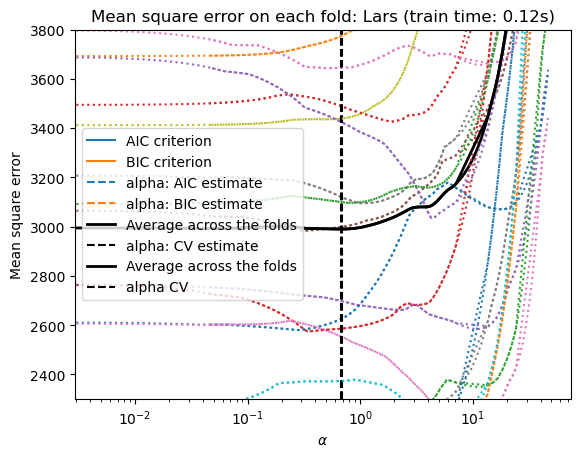

In [12]:
%run d01_1_eg9_plot_lasso_model_selection.py

#### 1.1.3.1.2. Information-criteria based model selection / 基于信息准则的模型选择

Alternatively, the estimator `LassoLarsIC` proposes to use the Akaike information criterion (AIC) and the Bayes Information criterion (BIC). It is a computationally cheaper alternative to find the optimal value of alpha as the regularization path is computed only once instead of k+1 times when using k-fold cross-validation.

Indeed, these criteria are computed on the in-sample training set. In short, they penalize the over-optimistic scores of the different Lasso models by their flexibility (cf. to “Mathematical details” section below).

However, such criteria need a proper estimation of the degrees of freedom of the solution, are derived for large samples (asymptotic results) and assume the correct model is candidates under investigation. They also tend to break when the problem is badly conditioned (e.g. more features than samples).

或者，估计器`LassoLarsIC`建议使用赤池信息准则 (AIC) 和贝叶斯信息准则 (BIC)。这是一种计算成本更低的替代方法来找到 alpha 的最优值，因为正则化路径仅计算一次，而不是使用 k 倍交叉验证时计算 k+1 次。

实际上，这些标准是在样本内训练集上计算的。简而言之，它们通过灵活性惩罚不同 Lasso 模型的过度乐观分数（参见下面的“数学细节”部分）。

但是，这些标准需要对解决方案的自由度进行适当的估计，这些标准是针对大样本（渐近结果）得出的，并假设正确的模型是正在研究的候选模型。当问题条件不佳时（例如特征多于样本），它们也往往会失效。

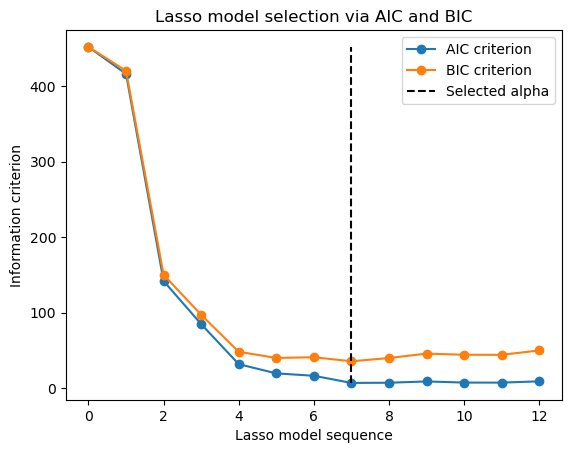

In [11]:
%run d01_1_eg10_plot_lasso_lars_ic.py

**Examples**
- [Lasso model selection: AIC-BIC / cross-validation](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py)
- [Lasso model selection via information criteria](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars_ic.html#sphx-glr-auto-examples-linear-model-plot-lasso-lars-ic-py)

#### 1.1.3.1.3. AIC and BIC criteria / AIC 和 BIC 标准

The definition of AIC (and thus BIC) might differ in the literature. In this section, we give more information regarding the criterion computed in scikit-learn.

AIC（以及 BIC）的定义在文献中可能有所不同。在本节中，我们将提供有关在 scikit-learn 中计算的标准的更多信息。

#### 1.1.3.1.4. Comparison with the regularization parameter of SVM / 与SVM正则化参数的比较

The equivalence between `alpha` and the regularization parameter of SVM, `C` is given by `alpha = 1 / C` or `alpha = 1 / (n_samples * C)`, depending on the estimator and the exact objective function optimized by the model.

`alpha` 与 SVM 的正则化参数 `C` 之间的等价性由 `alpha = 1 / C` 或 `alpha = 1 / (n_samples * C)` 给出，具体取决于估计器和模型优化的确切目标函数。

### 1.1.4. Multi-task Lasso / 多任务套索

The `MultiTaskLasso` is a linear model that estimates sparse coefficients for multiple regression problems jointly: `y` is a 2D array, of shape `(n_samples, n_tasks)`. The constraint is that the selected features are the same for all the regression problems, also called tasks.

The following figure compares the location of the non-zero entries in the coefficient matrix W obtained with a simple Lasso or a MultiTaskLasso. The Lasso estimates yield scattered non-zeros while the non-zeros of the MultiTaskLasso are full columns.

`MultiTaskLasso` 是一个线性模型，用于联合估计多元回归问题的稀疏系数：`y` 是一个二维数组，形状为 `(n_samples, n_tasks)`。约束条件是所选特征对于所有回归问题（也称为任务）都是相同的。

下图比较了使用简单 Lasso 或 MultiTaskLasso 获得的系数矩阵 W 中非零项的位置。Lasso 估计会产生分散的非零值，而 MultiTaskLasso 的非零值是满列。

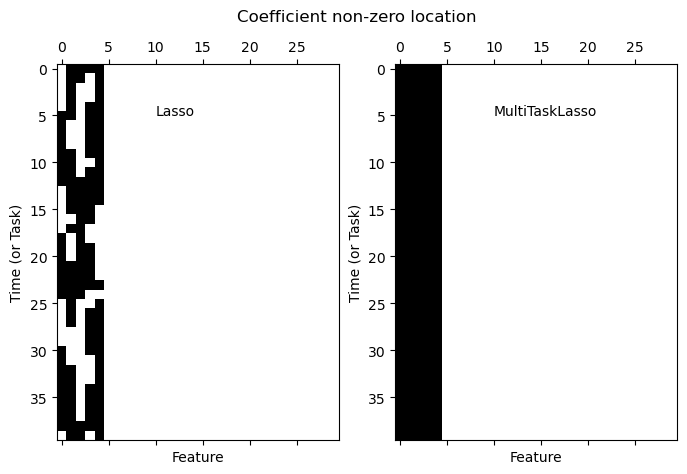

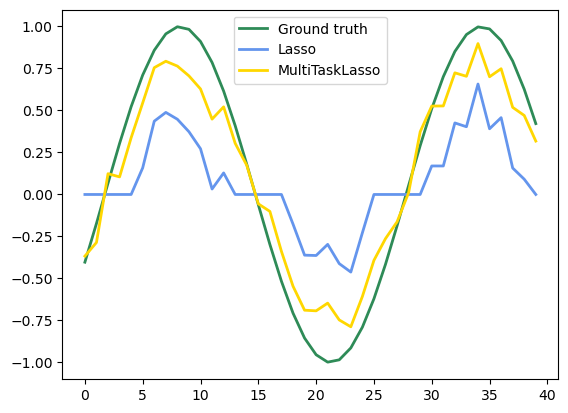

In [13]:
%run d01_1_eg11_plot_multi_task_lasso_support.py

**Examples**
- [Joint feature selection with multi-task Lasso](https://scikit-learn.org/stable/auto_examples/linear_model/plot_multi_task_lasso_support.html#sphx-glr-auto-examples-linear-model-plot-multi-task-lasso-support-py)

### 1.1.5. Elastic-Net / 弹性网络

`ElasticNet` is a linear regression model trained with both $l1$ and $l2$-norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like `Lasso`, while still maintaining the regularization properties of `Ridge`. We control the convex combination of $l1$ and $l2$ using the `l1_ratio` parameter.

Elastic-net is useful when there are multiple features that are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is that it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

The objective function to minimize is in this case
$$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
    \frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$$


`ElasticNet` 是一个使用 $l1$ 和 $l2$ 范数正则化系数进行训练的线性回归模型。这种组合允许学习稀疏模型，其中很少有权重像 `Lasso` 一样非零，同时仍保持 `Ridge` 的正则化属性。我们使用 `l1_ratio` 参数控制 $l1$ 和 $l2$ 的凸组合。

当有多个相互关联的特征时，Elastic-net 很有用。Lasso 可能会随机选择其中一个，而 elastic-net 可能会同时选择两者。

Lasso 和 Ridge 之间权衡的一个实际优势是，它允许 Elastic-Net 继承 Ridge 在旋转下的一些稳定性。

在这种情况下，要最小化的目标函数是

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


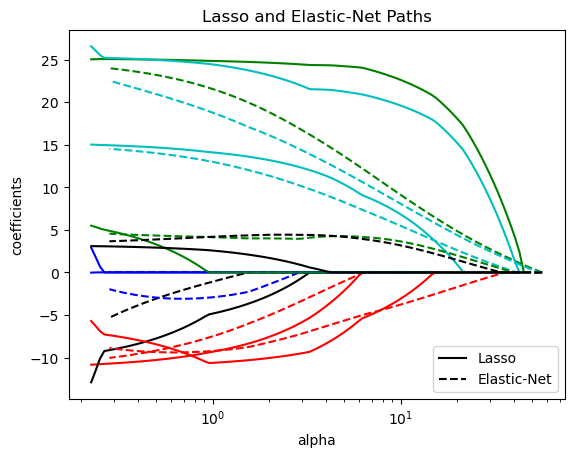

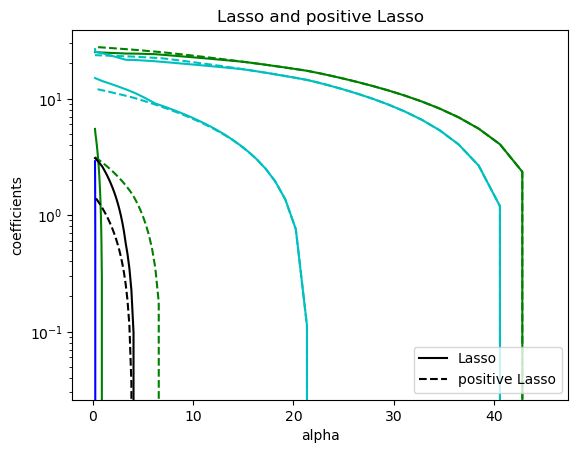

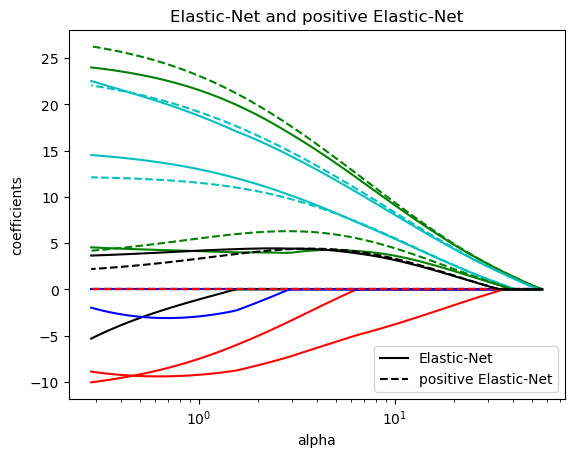

In [16]:
%run d01_1_eg12_plot_lasso_coordinate_descent_path.py

The class ElasticNetCV can be used to set the parameters alpha ($\alpha$) and l1_ratio ($\rho$) by cross-validation.

ElasticNetCV 类可用于通过交叉验证设置参数 alpha ($\alpha$) 和 l1_ratio ($\rho$)。

**Examples**
- [L1-based models for Sparse Signals](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html#sphx-glr-auto-examples-linear-model-plot-lasso-and-elasticnet-py)
- [Lasso and Elastic Net](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py)
- [Fitting an Elastic Net with a precomputed Gram Matrix and Weighted Samples](https://scikit-learn.org/stable/auto_examples/linear_model/plot_elastic_net_precomputed_gram_matrix_with_weighted_samples.html#sphx-glr-auto-examples-linear-model-plot-elastic-net-precomputed-gram-matrix-with-weighted-samples-py)

### 1.1.6. Multi-task Elastic-Net / 多任务弹性网络

The `MultiTaskElasticNet` is an elastic-net model that estimates sparse coefficients for multiple regression problems jointly: Y is a 2D array of shape `(n_samples, n_tasks)`. The constraint is that the selected features are the same for all the regression problems, also called tasks.

Mathematically, it consists of a linear model trained with a mixed $l1 l2$-norm and $l2$-norm for regularization. The objective function to minimize is:
$$\min_{W} { \frac{1}{2n_{\text{samples}}} ||X W - Y||_{\text{Fro}}^2 + \alpha \rho ||W||_{2 1} +
    \frac{\alpha(1-\rho)}{2} ||W||_{\text{Fro}}^2}$$

The implementation in the class `MultiTaskElasticNet` uses coordinate descent as the algorithm to fit the coefficients.

The class `MultiTaskElasticNetCV` can be used to set the parameters `alpha` ($\alpha$) and `l1_ratio` ($\rho$) by cross-validation.

`MultiTaskElasticNet` 是一个弹性网络模型，用于联合估计多个回归问题的稀疏系数：Y 是一个形状为 `(n_samples, n_tasks)` 的二维数组。约束条件是所选特征对于所有回归问题（也称为任务）都是相同的。

从数学上讲，它由一个使用混合 $l1 l2$ 范数和 $l2$ 范数进行正则化训练的线性模型组成。要最小化的目标函数是：

类`MultiTaskElasticNet`中的实现使用坐标下降作为拟合系数的算法。

类`MultiTaskElasticNetCV`可用于通过交叉验证设置参数`alpha`（$\alpha$）和`l1_ratio`（$\rho$）。

### 1.1.7. Least Angle Regression / 最小角回归

Least-angle regression (LARS) is a regression algorithm for high-dimensional data, developed by Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani. LARS is similar to forward stepwise regression. At each step, it finds the feature most correlated with the target. When there are multiple features having equal correlation, instead of continuing along the same feature, it proceeds in a direction equiangular between the features.

The advantages of LARS are:
- It is numerically efficient in contexts where the number of features is significantly greater than the number of samples.
- It is computationally just as fast as forward selection and has the same order of complexity as ordinary least squares.
- It produces a full piecewise linear solution path, which is useful in cross-validation or similar attempts to tune the model.
- If two features are almost equally correlated with the target, then their coefficients should increase at approximately the same rate. The algorithm thus behaves as intuition would expect, and also is more stable.
- It is easily modified to produce solutions for other estimators, like the Lasso.

The disadvantages of the LARS method include:
- Because LARS is based upon an iterative refitting of the residuals, it would appear to be especially sensitive to the effects of noise. This problem is discussed in detail by Weisberg in the discussion section of the Efron et al. (2004) Annals of Statistics article.

The LARS model can be used via the estimator `Lars`, or its low-level implementation `lars_path` or `lars_path_gram`.

最小角回归 (LARS) 是一种针对高维数据的回归算法，由 Bradley Efron、Trevor Hastie、Iain Johnstone 和 Robert Tibshirani 开发。LARS 类似于前向逐步回归。在每一步中，它都会找到与目标最相关的特征。当有多个特征具有相同的相关性时，它不会继续沿着同一特征进行，而是沿着特征之间等角的方向进行。

LARS 的优点是：
- 在特征数量明显大于样本数量的情况下，它在数值上是有效的。
- 它的计算速度与前向选择一样快，并且具有与普通最小二乘相同的复杂度。
- 它产生完整的分段线性解路径，这在交叉验证或类似的调整模型的尝试中很有用。
- 如果两个特征与目标几乎相等相关，那么它们的系数应该以大致相同的速率增加。因此，该算法的行为符合直觉预期，并且也更稳定。
- 它很容易修改，以便为其他估计器（如 Lasso）提供解决方案。

LARS 方法的缺点包括：
- 由于 LARS 基于残差的迭代重新拟合，因此它似乎对噪声的影响特别敏感。 Weisberg 在 Efron 等人（2004 年）《统计年鉴》文章的讨论部分详细讨论了这个问题。

LARS 模型可以通过估计器`Lars`或其低级实现`lars_path`或`lars_path_gram`使用。

### 1.1.8. LARS Lasso / LARS 套索

`LassoLars` is a lasso model implemented using the LARS algorithm, and unlike the implementation based on coordinate descent, this yields the exact solution, which is piecewise linear as a function of the norm of its coefficients.

`LassoLars` 是使用 LARS 算法实现的套索模型，与基于坐标下降的实现不同，它可以产生精确的解，该解是其系数范数的函数，呈分段线性。

Computing regularization path using the LARS ...
.

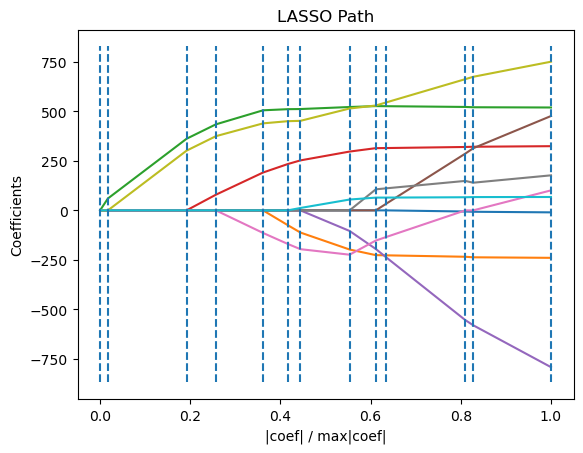

In [19]:
%run d01_1_eg15_plot_lasso_lars.py

In [17]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

LassoLars(alpha=0.1)

In [18]:
reg.coef_

array([0.6, 0. ])

**Examples**
- [Lasso path using LARS](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html#sphx-glr-auto-examples-linear-model-plot-lasso-lars-py)

### 1.1.9. Orthogonal Matching Pursuit (OMP) / 正交匹配追踪 (OMP)

`OrthogonalMatchingPursuit` and `orthogonal_mp` implement the OMP algorithm for approximating the fit of a linear model with constraints imposed on the number of non-zero coefficients (ie. the 
 pseudo-norm).

Being a forward feature selection method like `Least Angle Regression`, orthogonal matching pursuit can approximate the optimum solution vector with a fixed number of non-zero elements:

$$\underset{w}{\operatorname{arg\,min\,}} ||y - Xw||_2^2 \text{ subject to } ||w||_0 \leq n_{\text{nonzero-coefs}}$$

Alternatively, orthogonal matching pursuit can target a specific error instead of a specific number of non-zero coefficients. This can be expressed as:
$$\underset{w}{\operatorname{arg\,min\,}} ||w||_0 \text{ subject to } ||y-Xw||_2^2 \leq \text{tol}$$

OMP is based on a greedy algorithm that includes at each step the atom most highly correlated with the current residual. It is similar to the simpler matching pursuit (MP) method, but better in that at each iteration, the residual is recomputed using an orthogonal projection on the space of the previously chosen dictionary elements.

`OrthogonalMatchingPursuit` 和 `orthogonal_mp` 实现了 OMP 算法，用于近似线性模型的拟合度，并对非零系数的数量（即伪范数）施加约束。

正交匹配追踪是一种类似于`最小角回归`的前向特征选择方法，可以用固定数量的非零元素近似最优解向量：

或者，正交匹配追踪可以针对特定错误，而不是特定数量的非零系数。这可以表示为：

OMP 基于贪婪算法，该算法在每个步骤中都包含与当前残差最相关的原子。它类似于更简单的匹配追踪 (MP) 方法，但更好的是，在每次迭代中，都会使用先前选择的字典元素空间上的正交投影重新计算残差。

**Examples**
- [Orthogonal Matching Pursuit](https://scikit-learn.org/stable/auto_examples/linear_model/plot_omp.html#sphx-glr-auto-examples-linear-model-plot-omp-py)

### 1.1.10. Bayesian Regression

#### 1.1.10.1. Bayesian Ridge Regression

#### 1.1.10.2. Automatic Relevance Determination - ARD

### 1.1.11. Logistic regression

#### 1.1.11.1. Binary Case

#### 1.1.11.2. Multinomial Case

#### 1.1.11.3. Solvers

#### 1.1.11.3.1. Differences between solvers

### 1.1.12. Generalized Linear Models

#### 1.1.12.1. Usage

### 1.1.13. Stochastic Gradient Descent - SGD

### 1.1.14. Perceptron

### 1.1.15. Passive Aggressive Algorithms

### 1.1.16. Robustness regression: outliers and modeling errors

#### 1.1.16.1. Different scenario and useful concepts

#### 1.1.16.2. RANSAC: RANdom SAmple Consensus

#### 1.1.16.3. Theil-Sen estimator: generalized-median-based estimator

#### 1.1.16.4. Huber Regression

### 1.1.17. Quantile Regression

### 1.1.18. Polynomial regression: extending linear models with basis functions